In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from regressor import Regressor

In [2]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy()
sp_numpy = ds.sp.to_numpy()
data = np.stack((t2m_numpy, sp_numpy), axis=-1)
feature_list = [ds.t2m.name, ds.sp.name]

AUTOREG_SEQUENCE_LENGTH = 2
processor = DataProcessor(data)
X, y = processor.preprocess(AUTOREG_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [3]:
X.shape, X_train.shape, y_train.shape

((1079, 1, 25, 45, 2), (863, 1, 25, 45, 2), (863, 25, 45, 2))

In [4]:
data_shape = X.shape
linearreg = Regressor(data_shape, feature_list)
linearreg.train(X_train, y_train)

In [5]:
# X_new = X.reshape(-1, AUTOREG_SEQUENCE_LENGTH-1, 25, 45, 2)
# y_new = y.reshape(-1, 25, 45, 2)
# fig, ax = plt.subplots(2, 2, figsize=(12, 5))
# ax[0,0].imshow(X_new[0, -1, :, :, 0])
# ax[0,1].imshow(X_new[0, -1, :, :, 1])
# ax[1,0].imshow(y_new[0, :, :, 0])
# ax[1,1].imshow(y_new[0, :, :, 1])
# plt.show()
# X_new.shape, X_test.shape

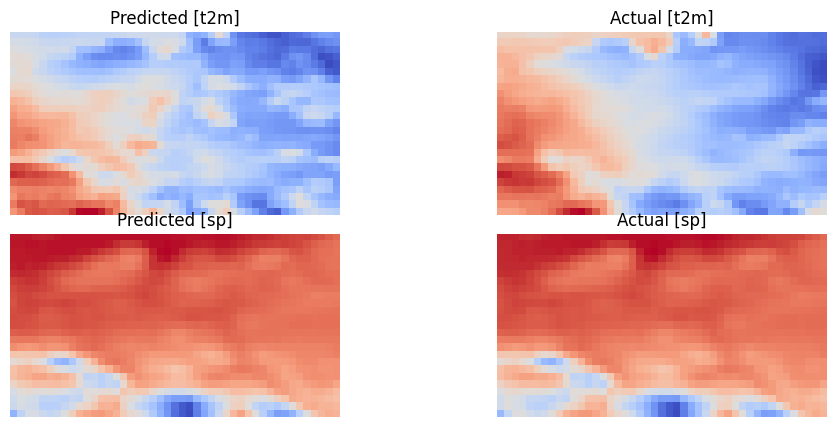

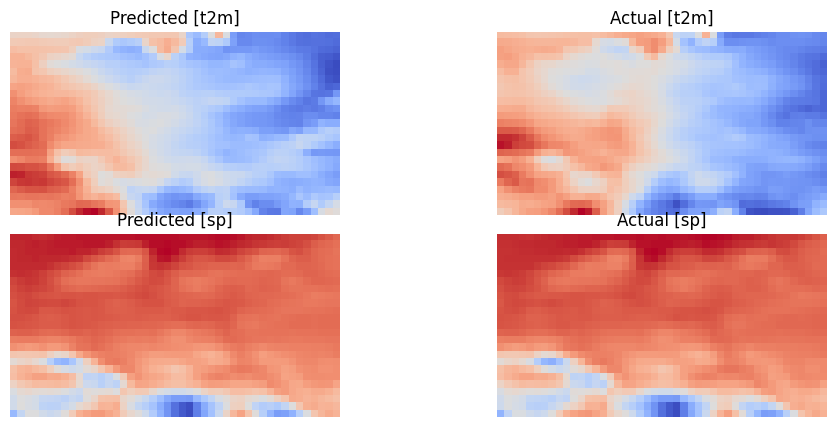

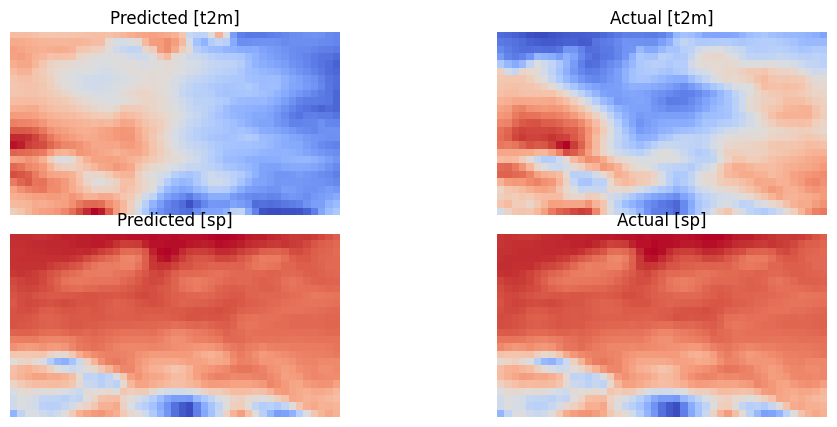

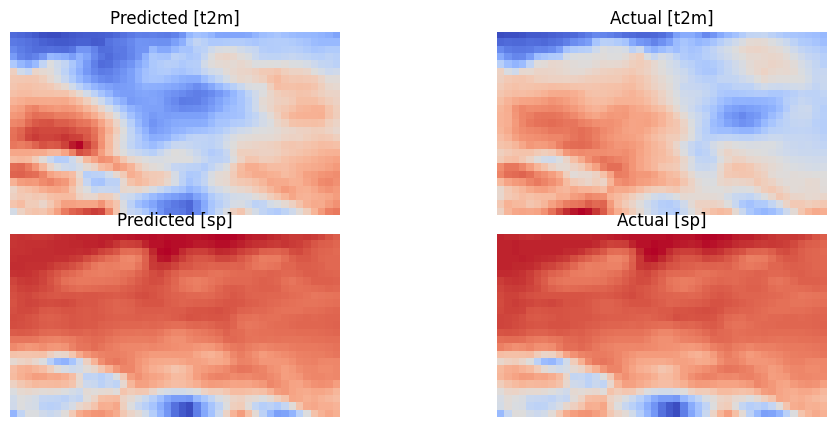

In [6]:
y_hat = linearreg.predict_and_evaluate(X_test, y_test, limit=4)

In [7]:
# from itertools import permutations
# import numpy as np
# import matplotlib.pyplot as plt
# import numpy.ma as ma


# my_list = [0, 1, 2, 3]
# all_permutations = list(permutations(my_list))

# for perm in all_permutations:
#     yh = y_hat.reshape(-1, 25, 45, 2)
#     yh = yh.transpose(perm)
    
#     masked_yh = ma.masked_array(yh[0, :, :, 0], mask=(yh[0, :, :, 0] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)

#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()
    

#     masked_yh = ma.masked_array(yh[:, 0, :, 0], mask=(yh[:, 0, :, 0] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)

#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()
    
    
#     masked_yh = ma.masked_array(yh[:, :, 0, 0], mask=(yh[:, :, 0, 0] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)
    
#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()
    
    
#     masked_yh = ma.masked_array(yh[0, 0, :, :], mask=(yh[0, 0, :, :] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)

#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()
    
    
#     masked_yh = ma.masked_array(yh[0, :, 0, :], mask=(yh[0, :, 0, :] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)

#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()

    
#     masked_yh = ma.masked_array(yh[:, 0, 0, :], mask=(yh[:, 0, 0, :] == 0))
#     masked_yh = ma.masked_values(masked_yh, 1, copy=False)

#     plt.imshow(masked_yh.filled(0))
#     plt.title('Position Permutation: ' + str(perm))
#     plt.show()


In [8]:
# fig, ax = plt.subplots(2, 4, figsize=(12, 5))
# ax[0,0].imshow(X_test[0, -1, :, :, 0])
# ax[0,1].imshow(X_test[0, -1, :, :, 1])
# ax[0,2].imshow(X_train[0, -1, :, :, 0])
# ax[0,3].imshow(X_train[0, -1, :, :, 1])
# ax[1,0].imshow(y_test[0, :, :, 0])
# ax[1,1].imshow(y_test[0, :, :, 1])
# ax[1,2].imshow(y_train[0, :, :, 0])
# ax[1,3].imshow(y_train[0, :, :, 1])
# plt.show()

In [9]:
# plt.figure(figsize=(12,10))
# yy = y[0].reshape(1,-1)
# plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
# plt.show()